In [37]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [38]:
# Load the data
df = pd.read_csv('forestfires_with_fwi_bui.csv')


df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
 11  BUI     517 non-null    float64
 12  FWI     517 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 52.6 KB


X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  \
count  517.000000  517.000000  517.000000  517.000000   517.000000   
mean    18.889168   44.288201    4.017602    0.021663    12.847292   
std      5.806625   16.317469    1.791653    0.295959    63.655818   
min      2.200000   15.000000    0.400000    0.000000     0.000000   
25%     15.500000   33.000000    2.700000    0.000000     0.000000   
50%     19.300000   42.000000    4.000000    0.000000     0.520000   
75%     22.800000   53.000000    4.900000    0.000000     6.570000   
max     33.300000  100.000000    9.400000    6.400000  1090.840000   

              BUI         FWI  
count  517.000000  517.000000  
mean   142.195745   30.673114  
std     72.356425   14.065076  
min      2.200000    0.000000  
25%     93.500000   23.300000  
50%    152.700000   32.600000  
75%    184.500000   39.300000  
max    315.600000   90.400000

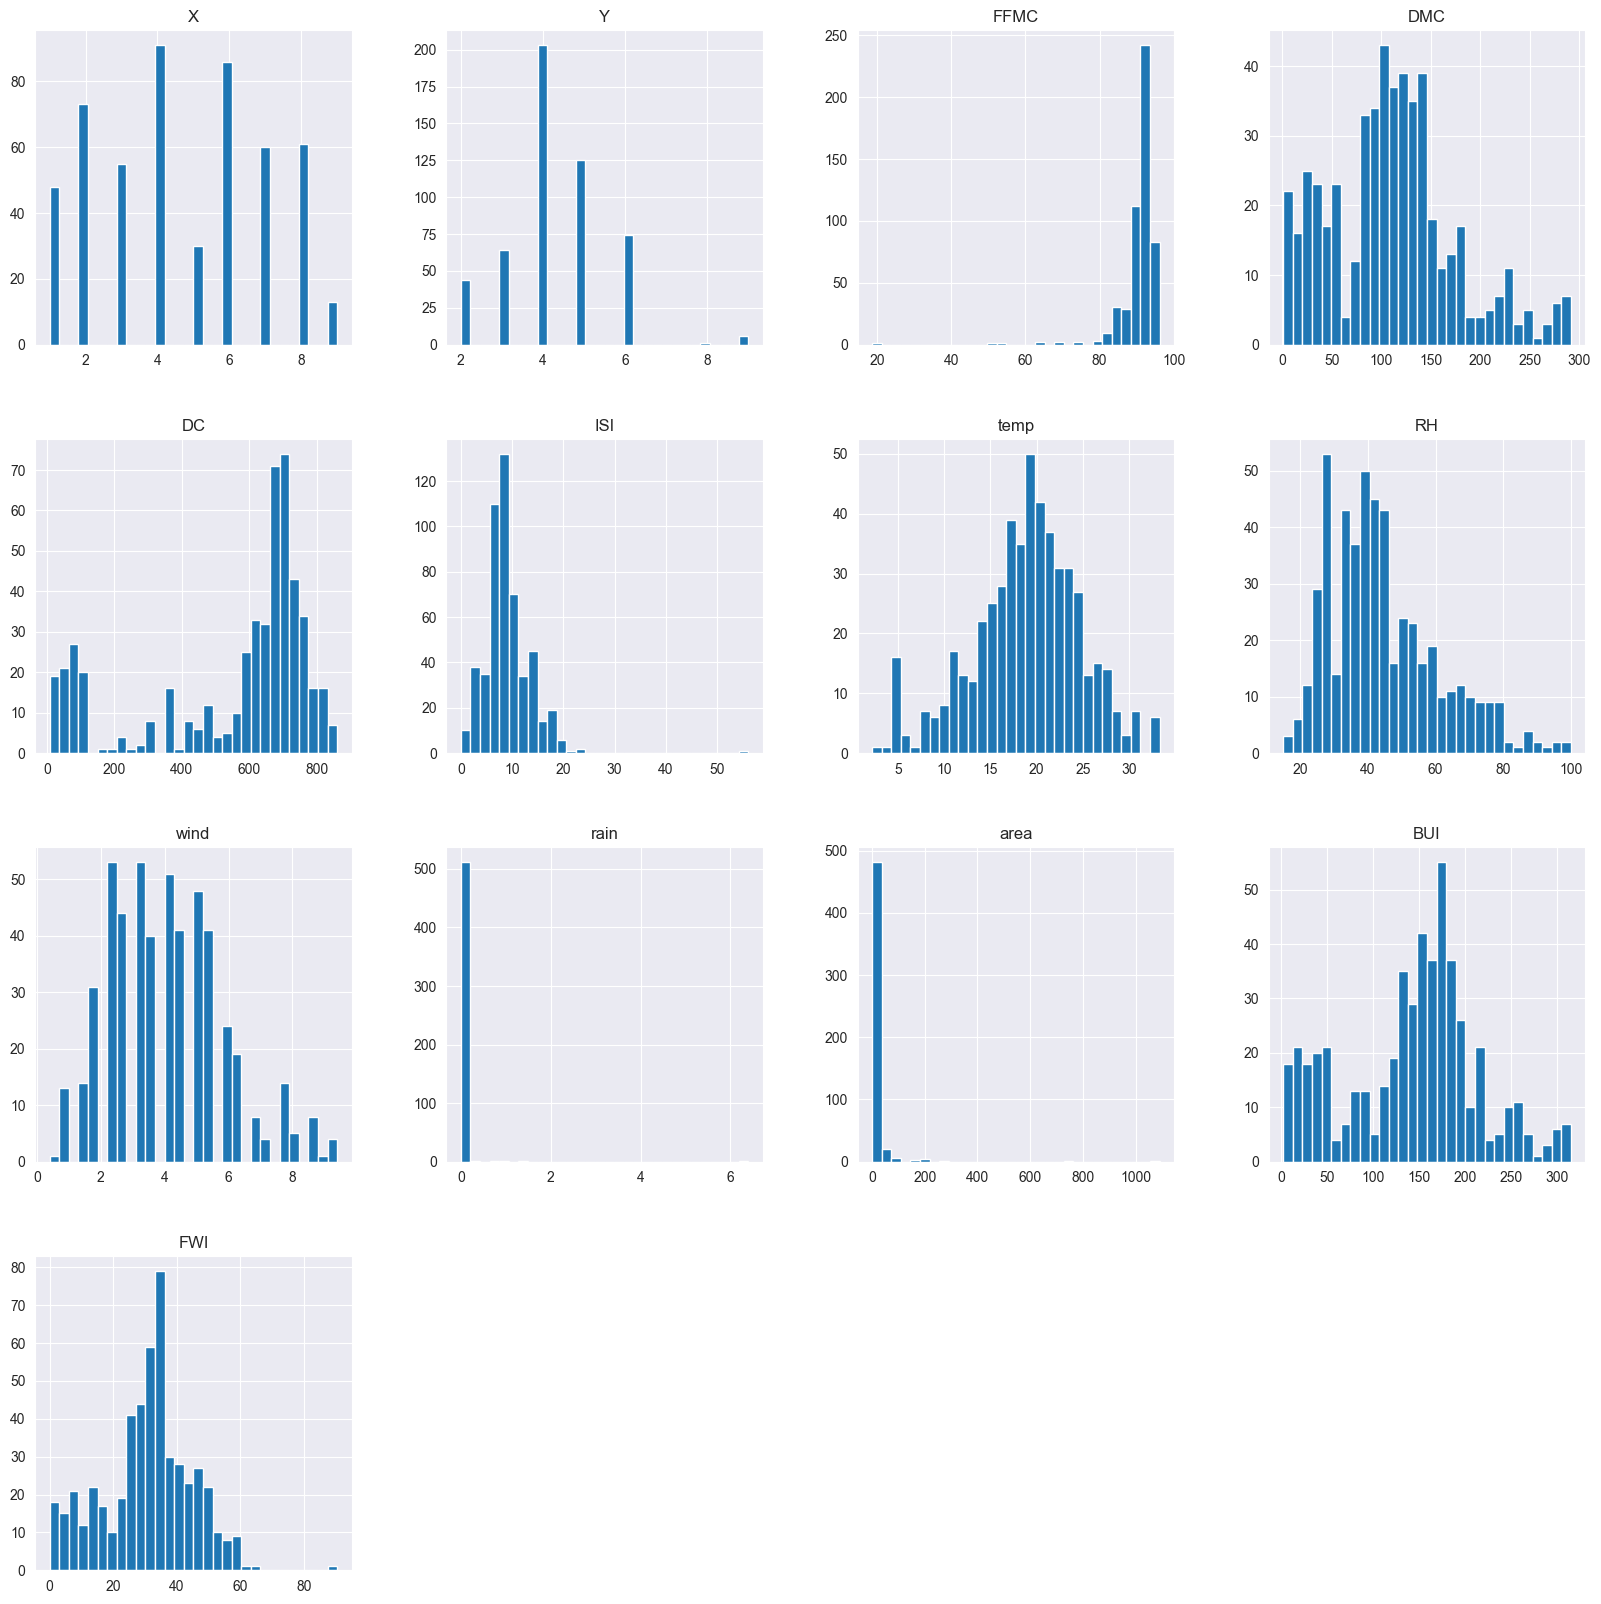

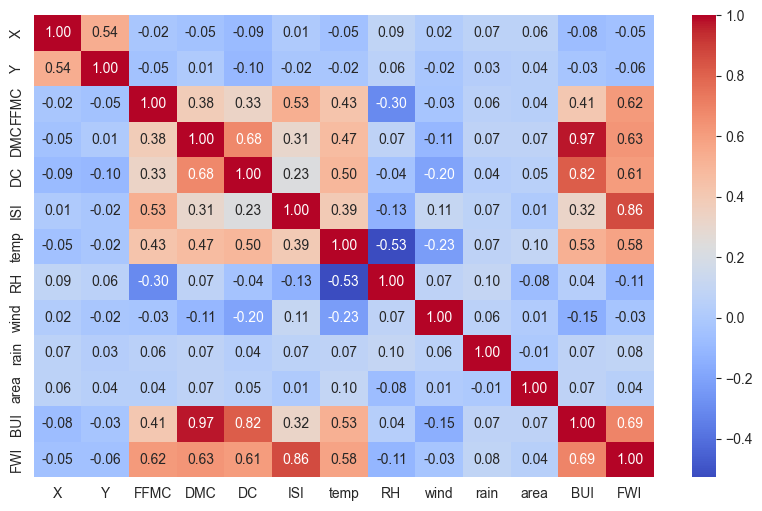

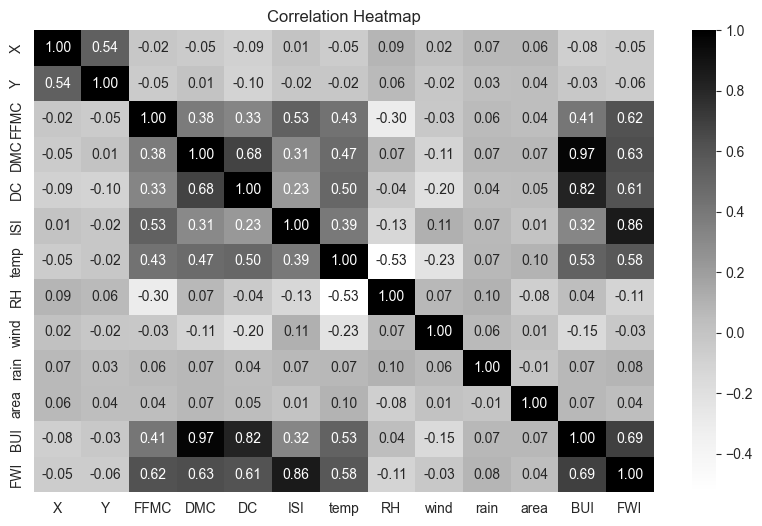

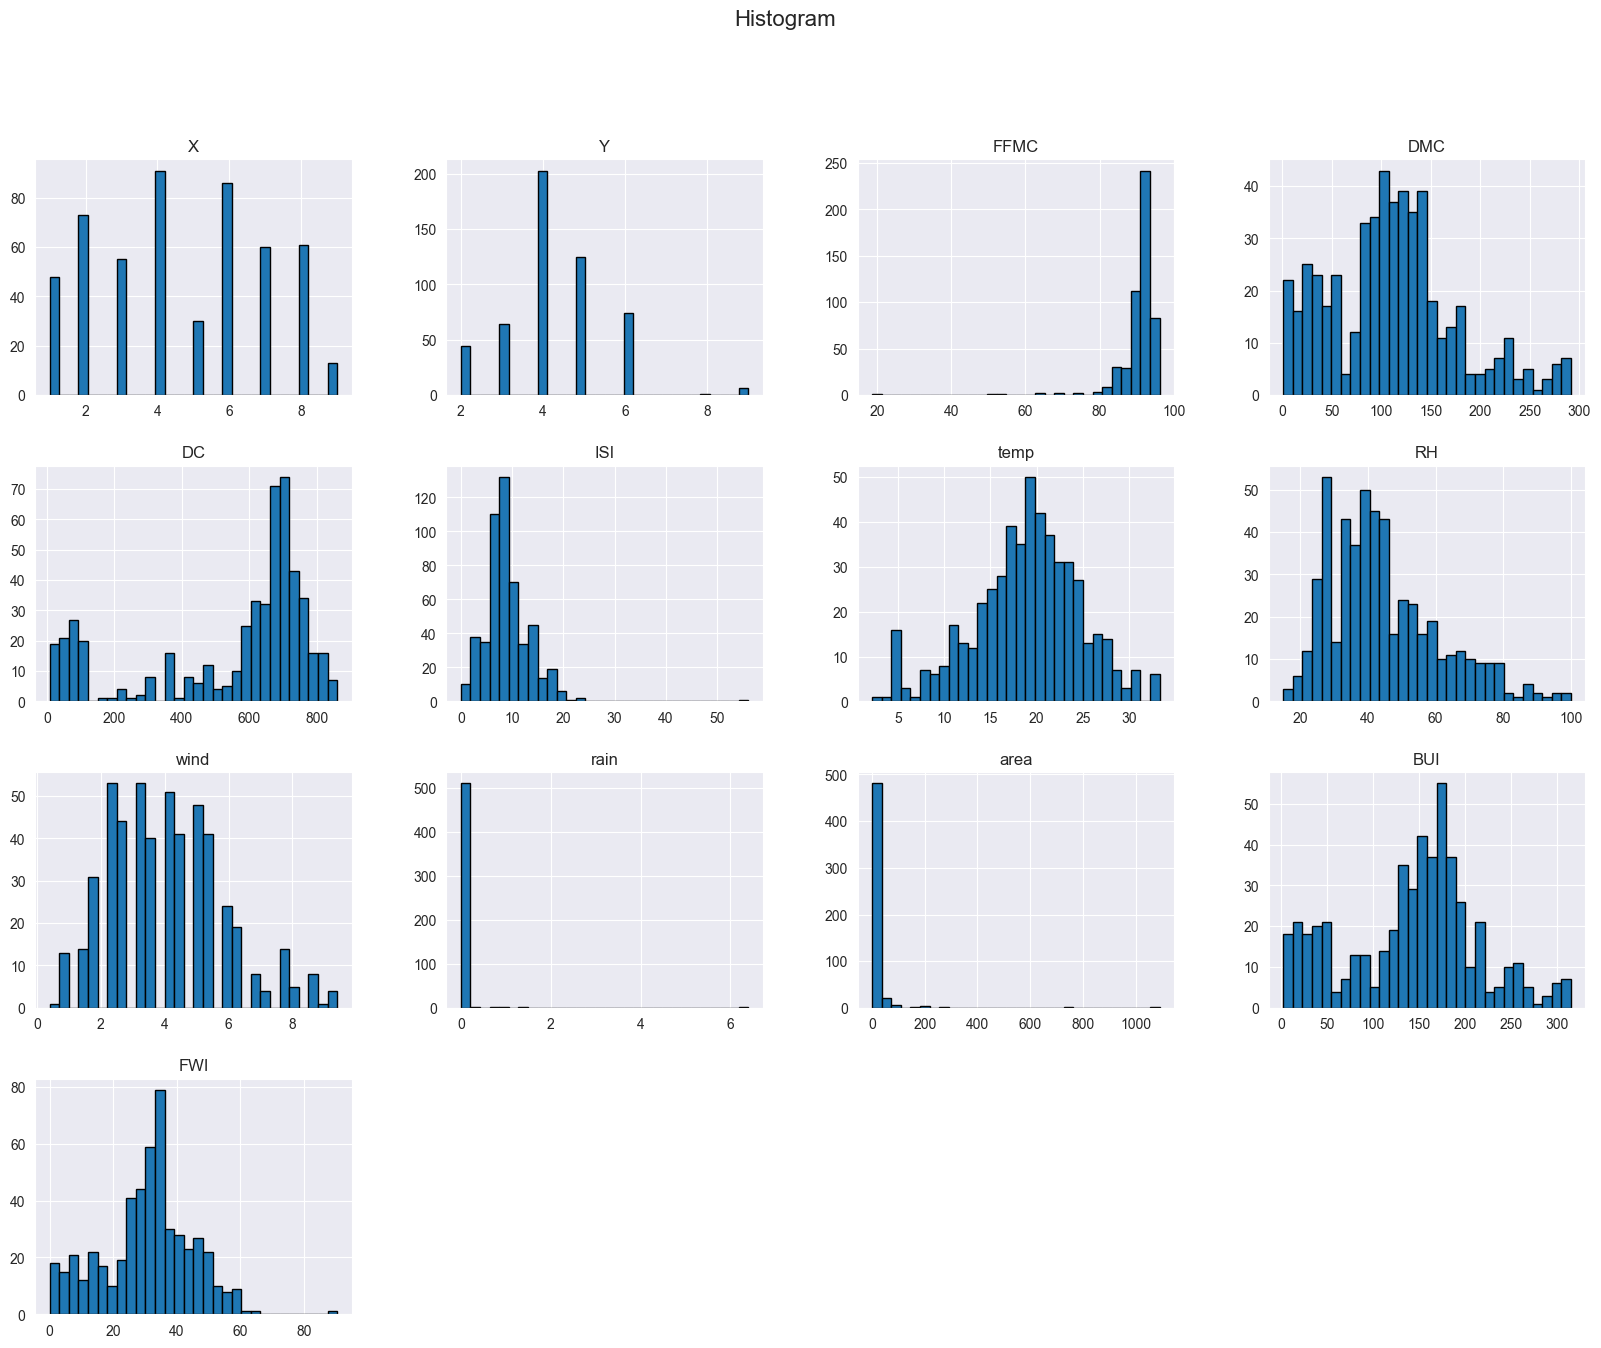

In [39]:
#check for distributions using histograms and plots
df.hist(figsize=(20,20), bins=30)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Heatmap with grayscale
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Greys', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Histograms with grayscale
df.hist(bins=30, figsize=(20, 15), edgecolor='black', )
plt.suptitle("Histogram", fontsize=16)
plt.show()

# Range Normalization

In [40]:
def range_normalization(df_inicial):
    range = df_inicial.max() - df_inicial.min()
    mean = df_inicial.mean()
    return (df_inicial - mean) / range

df_range = df.apply(range_normalization, axis=0)

print(df_range)

            X         Y      FFMC       DMC        DC       ISI      temp  \
0    0.291344  0.100028 -0.057351 -0.291772 -0.532004 -0.069905 -0.343703   
1    0.291344 -0.042830 -0.000577 -0.260070  0.142090 -0.041384 -0.028591   
2    0.291344 -0.042830 -0.000577 -0.231469  0.162965 -0.041384 -0.137915   
3    0.416344  0.242885  0.013617 -0.267306 -0.551706 -0.000386 -0.340488   
4    0.416344  0.242885 -0.017351 -0.205280 -0.522740  0.010309 -0.240809   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.083656 -0.185687 -0.116706 -0.186672  0.137985 -0.126946  0.286522   
513 -0.333656 -0.042830 -0.116706 -0.186672  0.137985 -0.126946  0.096811   
514  0.291344 -0.042830 -0.116706 -0.186672  0.137985 -0.126946  0.074303   
515 -0.458656 -0.042830  0.048456  0.121046  0.078292  0.040612  0.215782   
516  0.166344 -0.185687 -0.143802 -0.371717 -0.517462 -0.141206 -0.227948   

           RH      wind      rain      area       BUI       FWI  
0    0.07

# Z-score Normalization

In [41]:
def z_score_normalization(df_inicial):
    std_dev = df_inicial.std()
    mean = df_inicial.mean()
    return (df_inicial - mean) / std_dev

df_z_score = df.apply(z_score_normalization, axis=0)

print(df_z_score)

            X         Y      FFMC       DMC        DC       ISI      temp  \
0    1.007337  0.569309 -0.805180 -1.322045 -1.828706 -0.860113 -1.840857   
1    1.007337 -0.243765 -0.008094 -1.178399  0.488418 -0.509195 -0.153130   
2    1.007337 -0.243765 -0.008094 -1.048806  0.560173 -0.509195 -0.738668   
3    1.439531  1.382383  0.191177 -1.211188 -1.896429 -0.004751 -1.823636   
4    1.439531  1.382383 -0.243597 -0.930142 -1.796859  0.126843 -1.289763   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.289244 -1.056839 -1.638496 -0.845829  0.474309 -1.561947  1.534597   
513 -1.153631 -0.243765 -1.638496 -0.845829  0.474309 -1.561947  0.518517   
514  1.007337 -0.243765 -1.638496 -0.845829  0.474309 -1.561947  0.397965   
515 -1.585825 -0.243765  0.680298  0.548471  0.269122  0.499693  1.155720   
516  0.575144 -1.056839 -2.018923 -1.684282 -1.778719 -1.737406 -1.220876   

           RH      wind      rain      area       BUI       FWI  
0    0.41

In [42]:
df.head(500)

X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area    BUI   FWI
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   30.9  10.3
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   62.5  18.7
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   75.4  20.7
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   33.3  16.7
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   51.2  21.9
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...    ...   ...
495  6  6  96.2  175.5  661.8  16.8  23.9  42   2.2   0.0   0.00  211.1  54.3
496  4  5  96.2  175.5  661.8  16.8  32.6  26   3.1   0.0   2.77  211.1  54.3
497  3  4  96.1  181.1  671.2  14.3  32.3  27   2.2   0.0  14.68  216.3  49.3
498  6  5  96.1  181.1  671.2  14.3  33.3  26   2.7   0.0  40.54  216.3  49.3
499  7  5  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82  216.3  49.3

[500 rows x 13 columns]

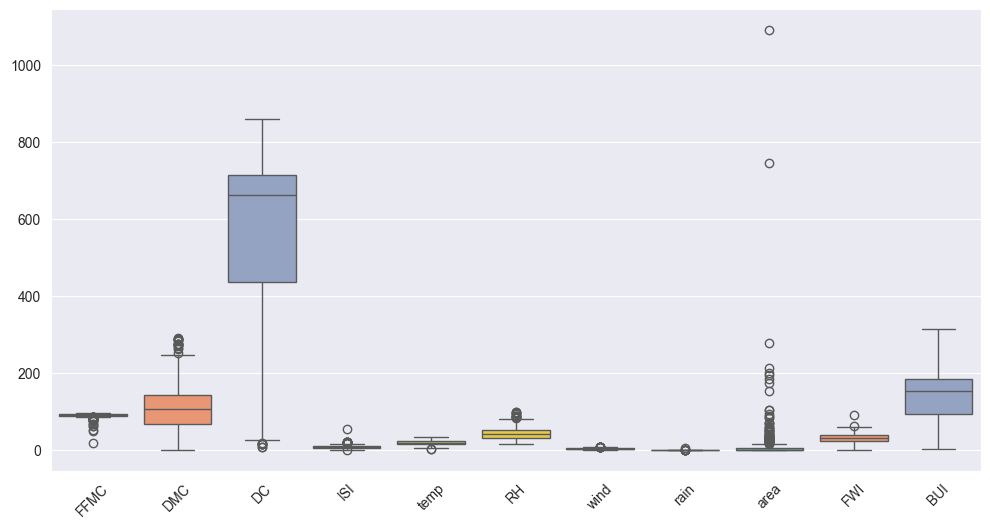

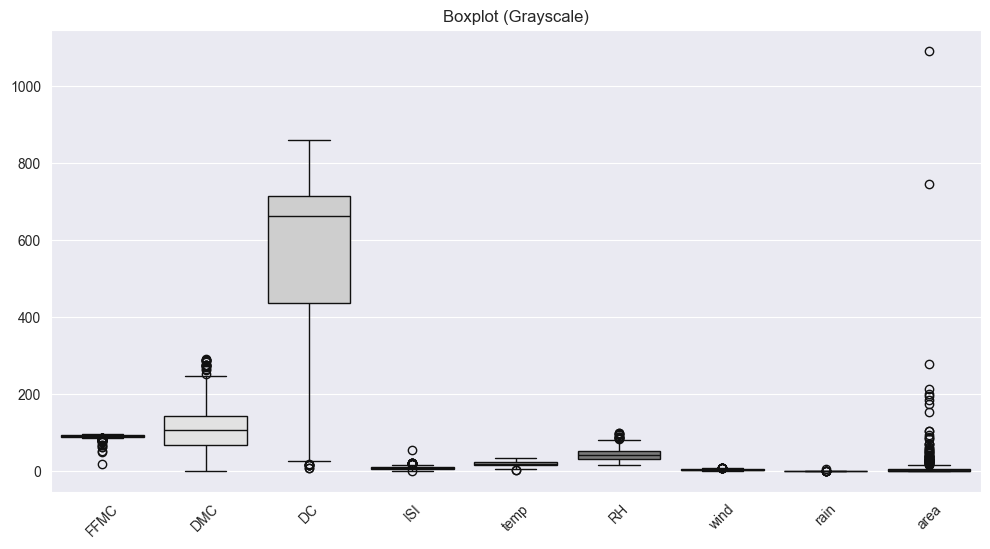

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'FWI', 'BUI']], palette="Set2")
plt.xticks(rotation=45)
plt.show()

# Boxplot with grayscale
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']], palette="Greys")
plt.xticks(rotation=45)
plt.title("Boxplot (Grayscale)")
plt.show()

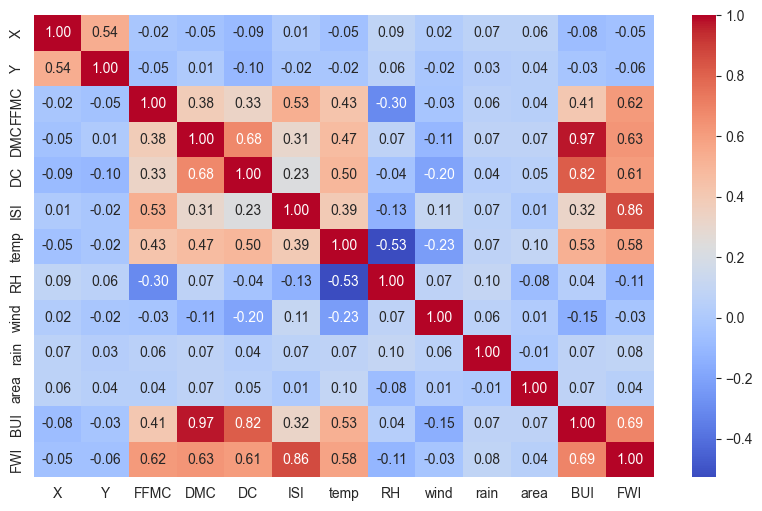

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

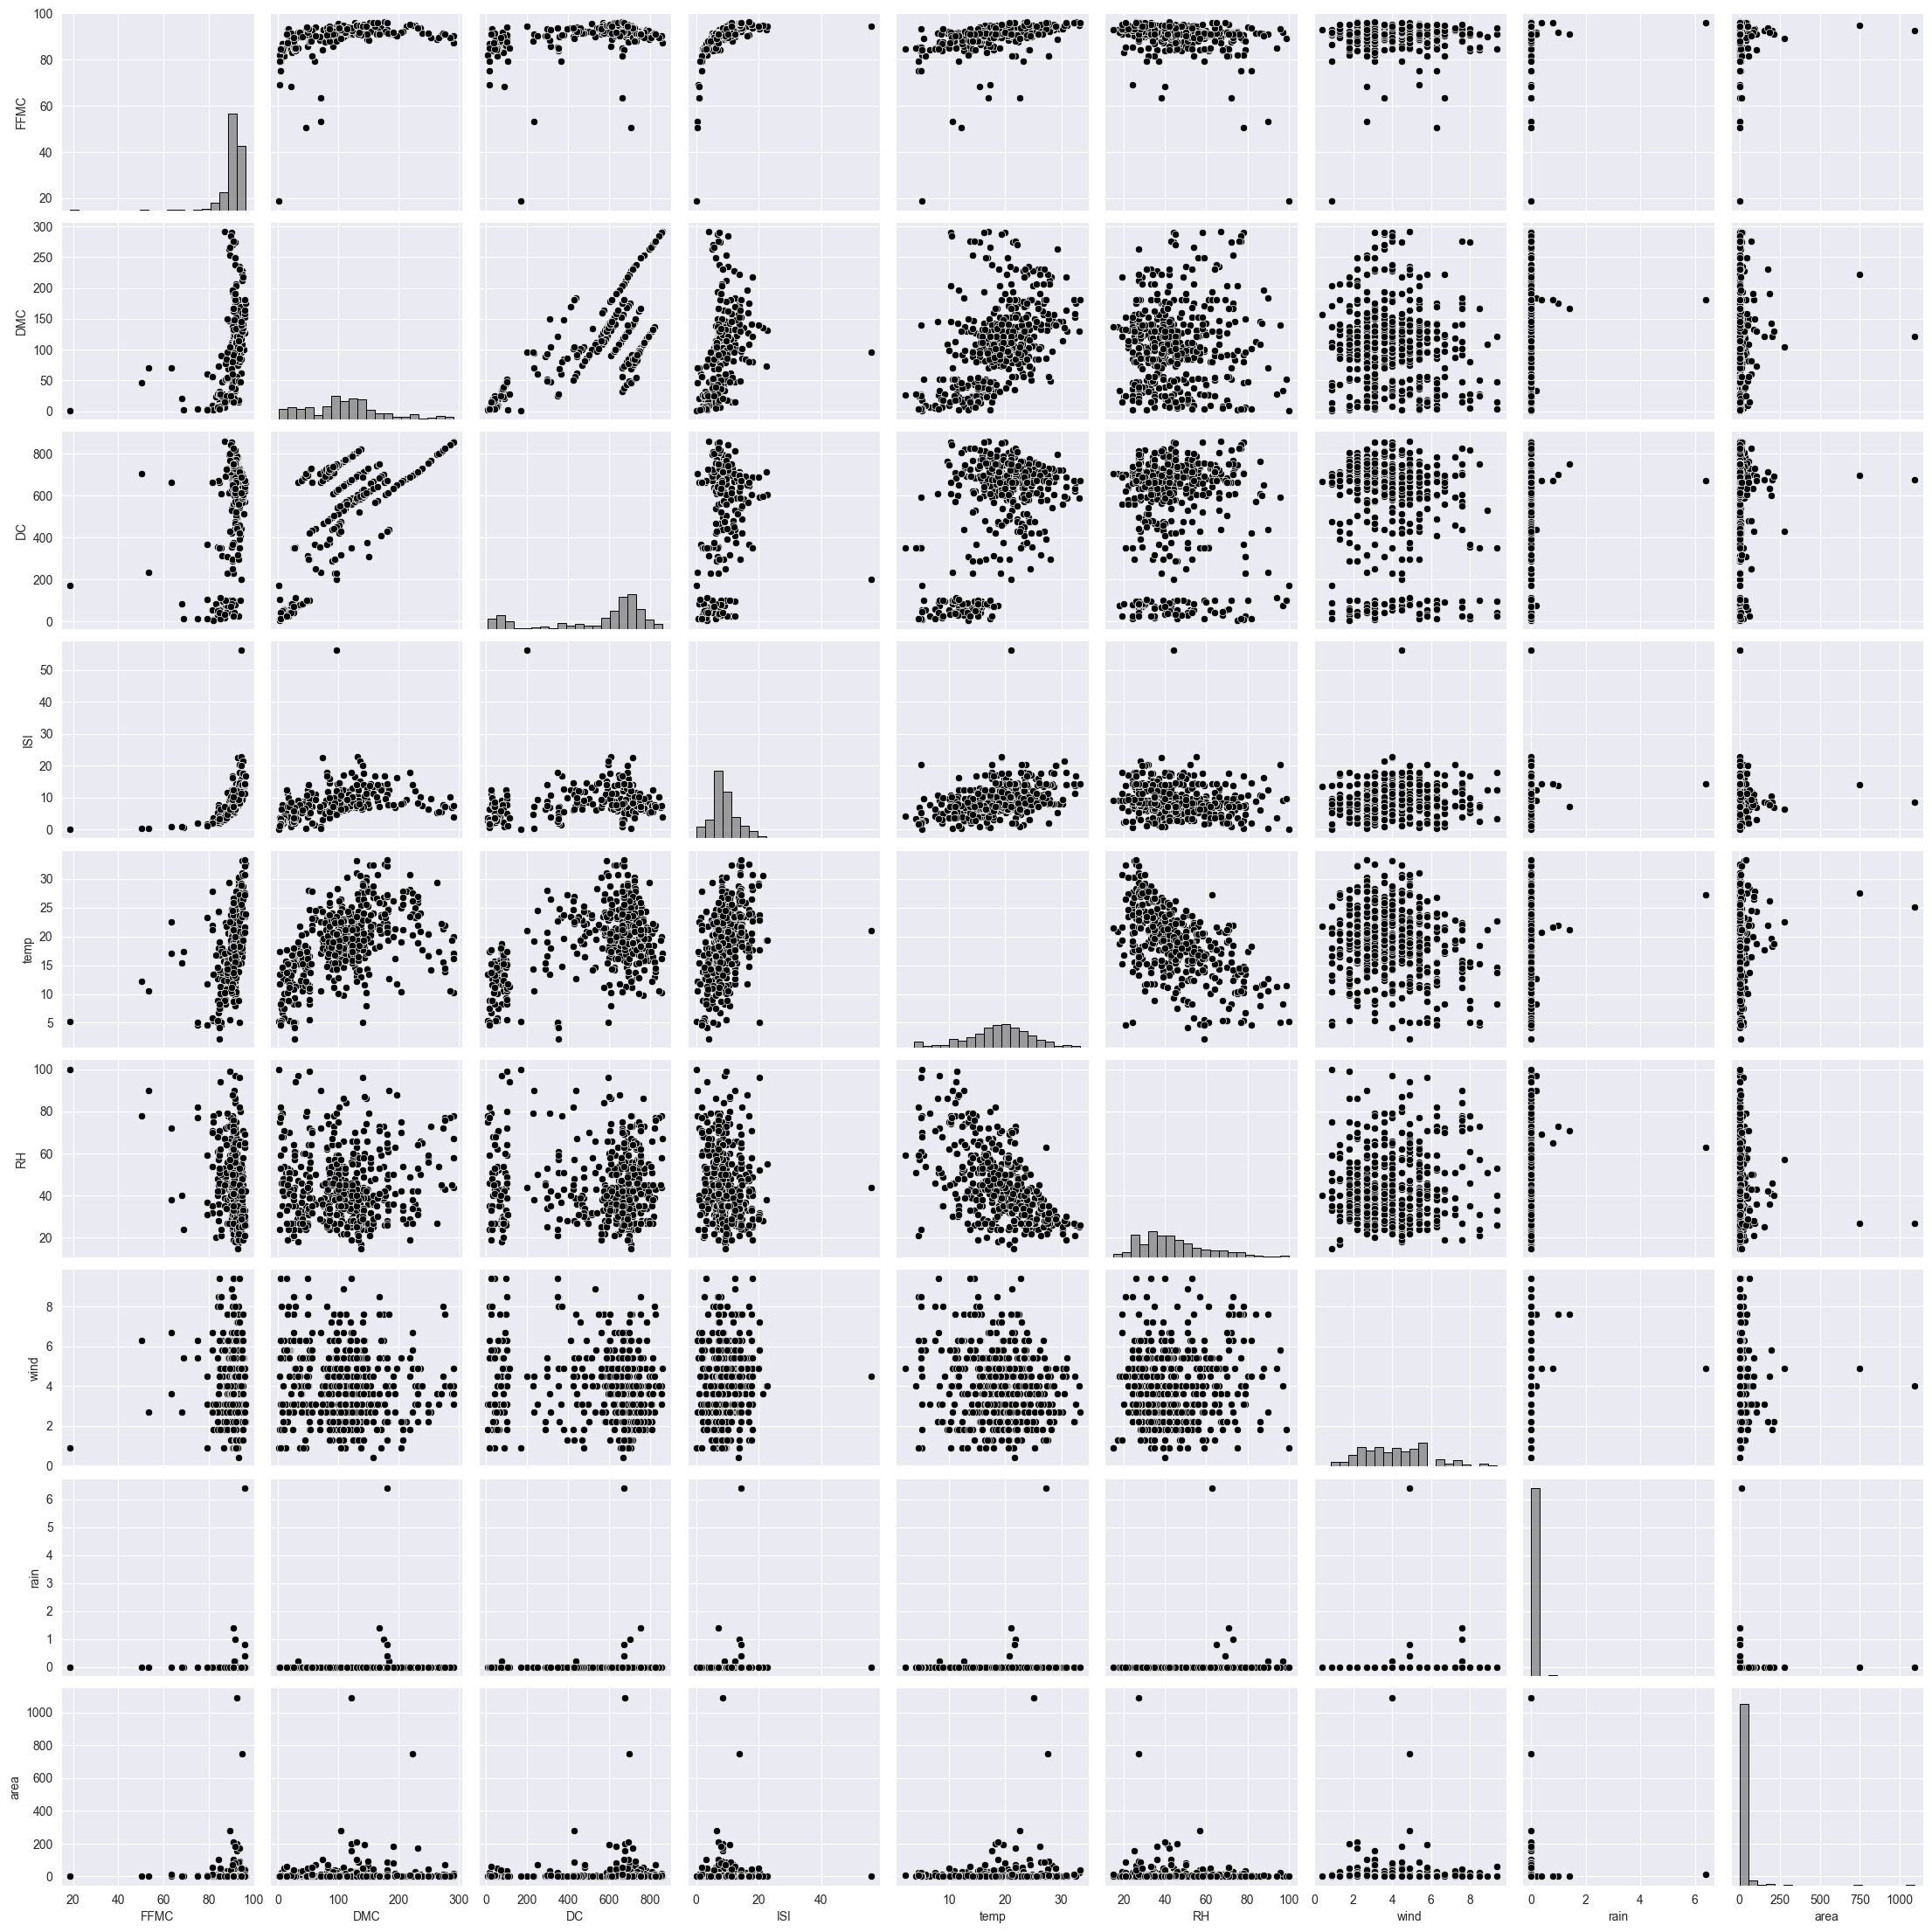

In [45]:
sns.pairplot(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']], plot_kws={'color': 'black'}, diag_kws={'color': 'gray', 'edgecolor': 'black', 'bins': 20})
plt.show()

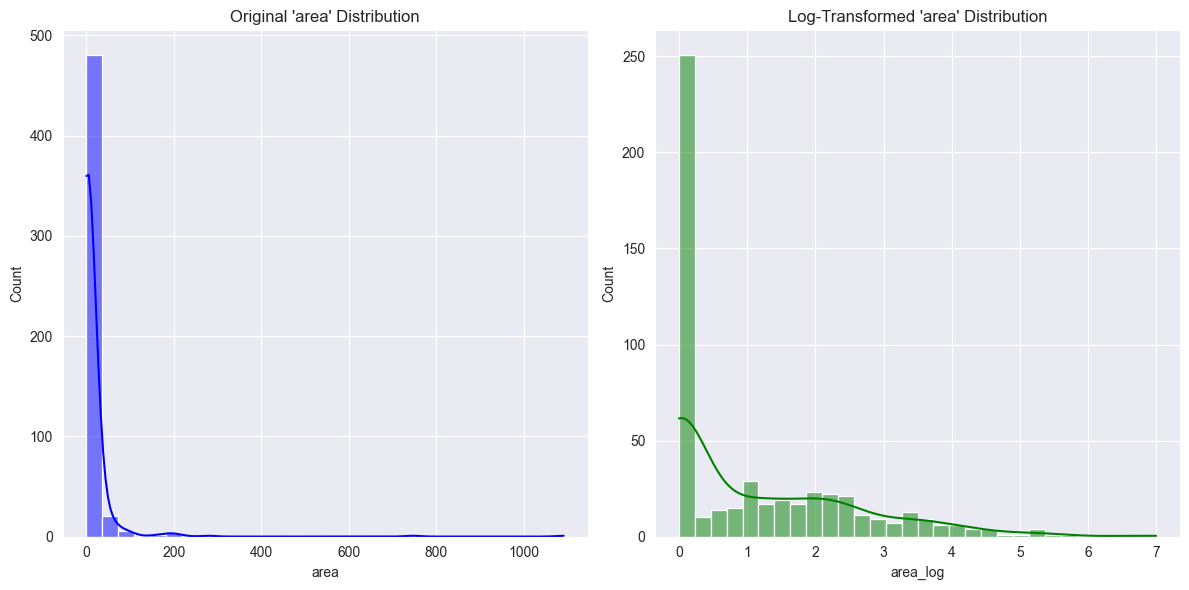

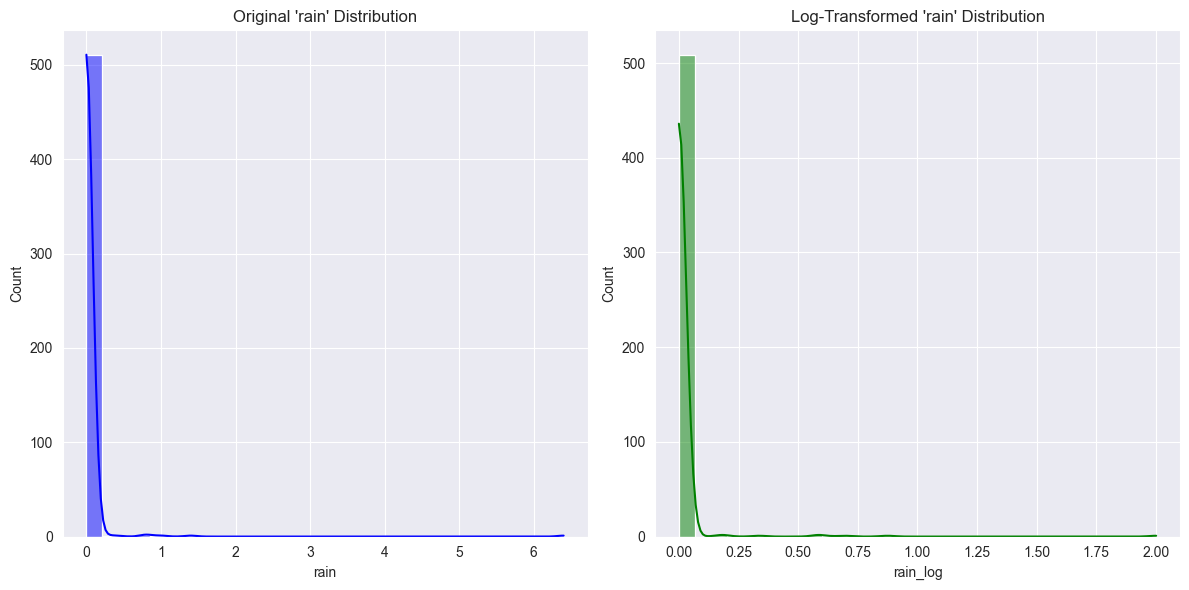

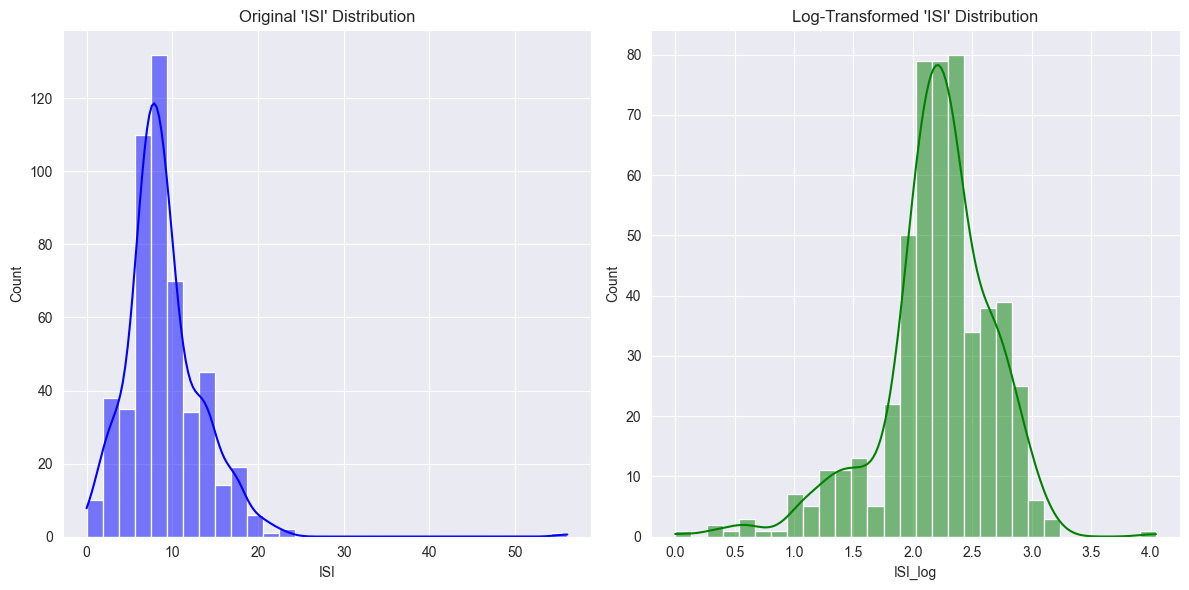

In [46]:
# Apply log transformation to the specified columns
columns_to_transform = ['area', 'rain', 'ISI']
for col in columns_to_transform:
    df[f'{col}_log'] = np.log1p(df[col])  # log1p handles log(0) by computing log(1 + x)

# Plot the original and transformed distributions
for col in columns_to_transform:
    plt.figure(figsize=(12, 6))

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Original '{col}' Distribution")

    # Transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df[f'{col}_log'], bins=30, kde=True, color='green')
    plt.title(f"Log-Transformed '{col}' Distribution")

    plt.tight_layout()
    plt.show()
small_data = df
def normalization_range(data):
    mean = data.mean()
    min = data.min()
    max = data.max()
    normalized_data = (data - mean) / (max - min)
    return normalized_data

def normalization_zscore(data):
    mean = data.mean()
    std = data.std()
    z_scores = (data - mean) / std
    return z_scores


C:\Users\tomfd\AppData\Local\Temp\ipykernel_14944\724239309.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.00733714  1.00733714  1.00733714  1.43953076  1.43953076  1.43953076
  1.43953076  1.43953076  1.43953076  1.00733714  1.00733714  1.00733714
  0.57514353  0.57514353  0.57514353  0.57514353  0.14294992  1.43953076
  0.57514353  0.57514353  0.57514353  0.14294992  1.00733714  1.00733714
  1.00733714  1.00733714  1.00733714  1.00733714  0.57514353  0.57514353
  0.57514353  0.57514353  0.57514353  0.57514353  0.57514353  0.57514353
  0.57514353  1.00733714  1.00733714 -0.28924369 -0.28924369 -0.28924369
 -0.28924369 -0.28924369 -0.28924369  0.14294992  0.14294992  0.57514353
 -0.28924369 -0.28924369 -0.28924369 -0.28924369 -0.28924369 -0.28924369
 -0.28924369 -0.28924369 -0.28924369 -0.28924369 -1.15363092 -1.15363092
 -1.15363092 -1.15363092 -1.15363092 -1.15363092 -1.15363092 -1.15363092
 -1.15363092 

<Figure size 1200x800 with 0 Axes>

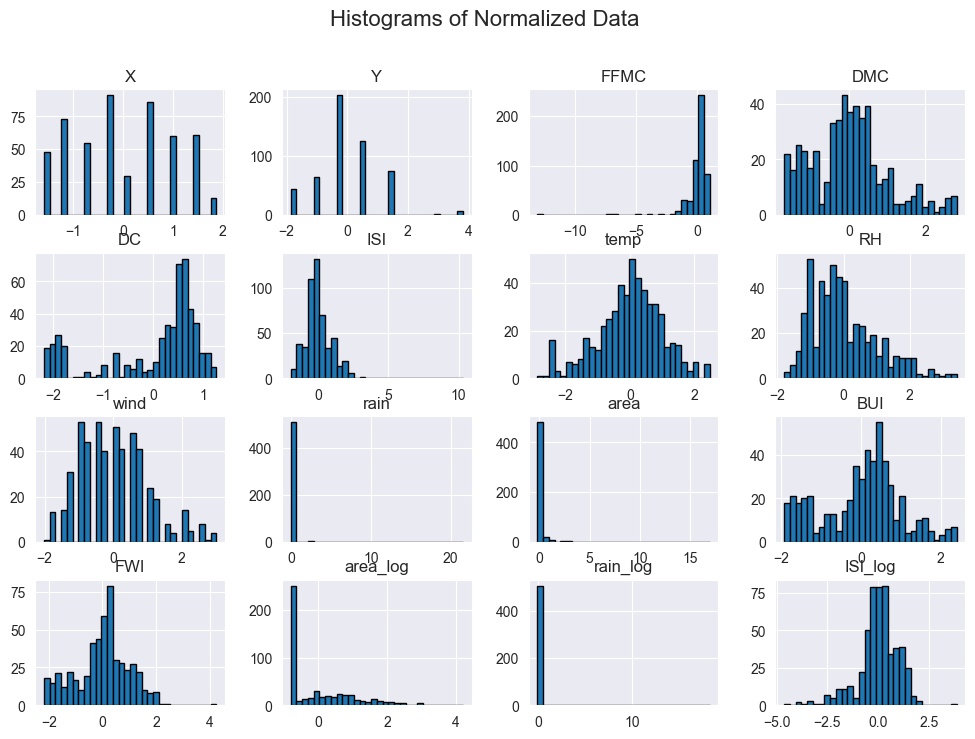

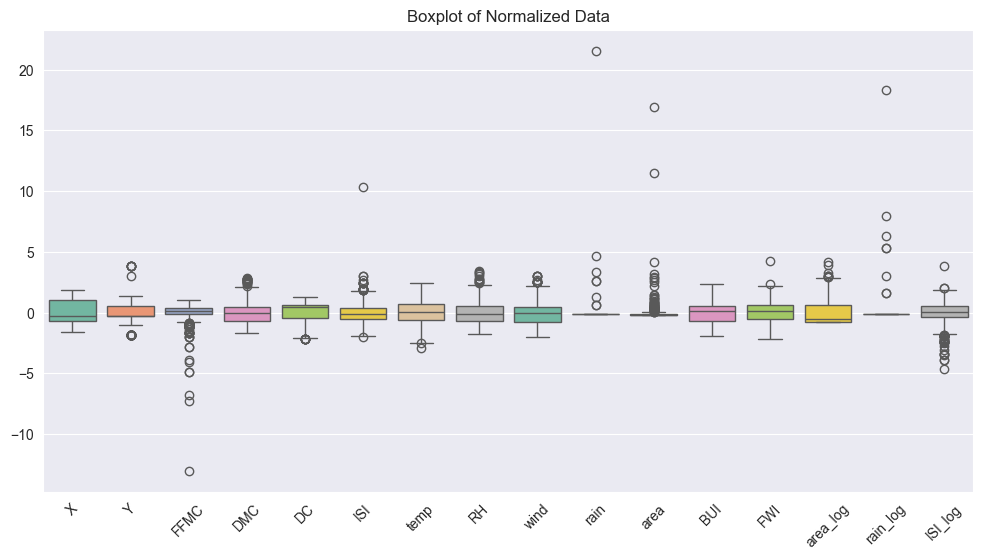

In [47]:
# Explicitly cast the result to float64 to avoid dtype incompatibility
for col in small_data.columns:
    small_data.loc[:, col] = normalization_zscore(small_data[col]).astype('float64')
    
# Plot histograms for the normalized data
plt.figure(figsize=(12, 8))
small_data.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Normalized Data", fontsize=16)
plt.show()

# Plot boxplots for the normalized data
plt.figure(figsize=(12, 6))
sns.boxplot(data=small_data, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot of Normalized Data")
plt.show()

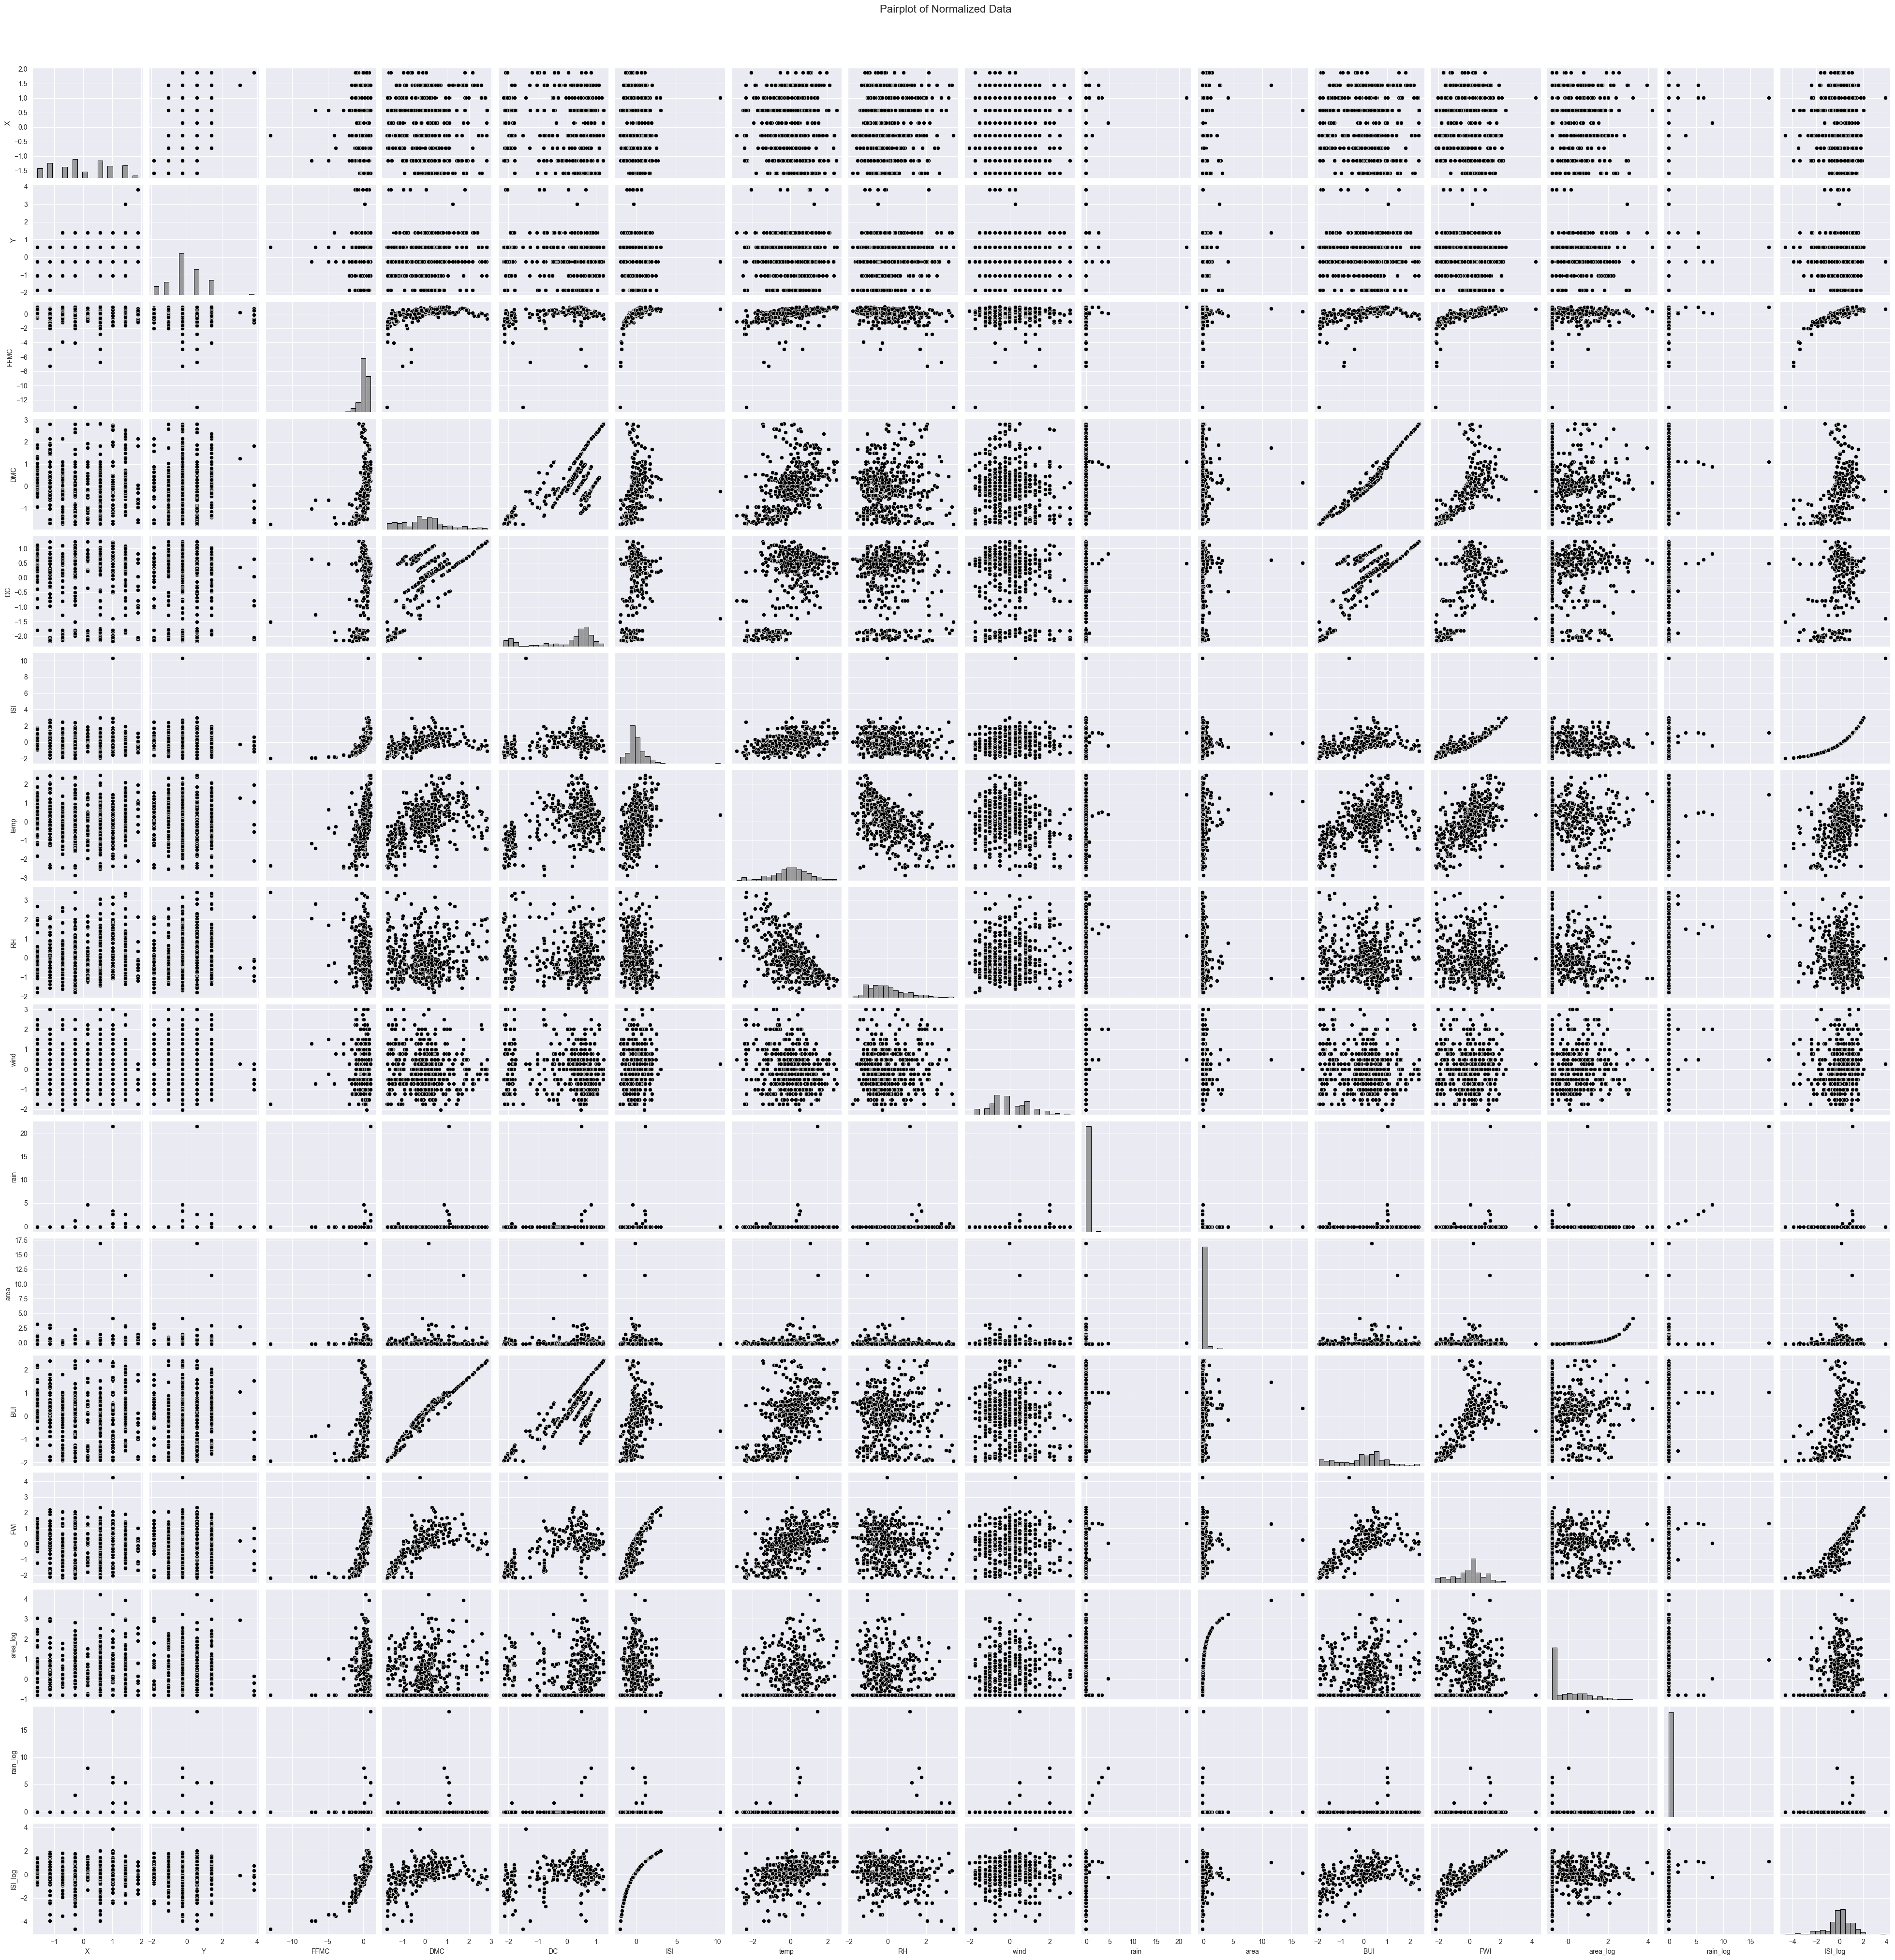

In [48]:
# Pairplot with normalized data
sns.pairplot(small_data, 
             plot_kws={'color': 'black'}, 
             diag_kws={'color': 'gray', 'edgecolor': 'black', 'bins': 20})
plt.suptitle("Pairplot of Normalized Data", y=1.02, fontsize=16)
plt.show()